In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("Model1.csv",date_parser=True)
df.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
0,2020-03-11,62,6,4.857,1,1,0.143,0.045,0.004,0.004,0.001,0.001,0.0
1,2020-03-12,73,11,6.143,1,0,0.143,0.053,0.008,0.004,0.001,0.000,0.0
2,2020-03-13,82,9,7.286,2,1,0.286,0.059,0.007,0.005,0.001,0.001,0.0
3,2020-03-14,102,20,9.714,2,0,0.286,0.074,0.014,0.007,0.001,0.000,0.0
4,2020-03-15,113,11,10.571,2,0,0.286,0.082,0.008,0.008,0.001,0.000,0.0


In [ ]:
train=df[df['date']<='2021-03-30'].copy()
train

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
0,2020-03-11,62,6,4.857,1,1,0.143,0.045,0.004,0.004,0.001,0.001,0.000
1,2020-03-12,73,11,6.143,1,0,0.143,0.053,0.008,0.004,0.001,0.000,0.000
2,2020-03-13,82,9,7.286,2,1,0.286,0.059,0.007,0.005,0.001,0.001,0.000
3,2020-03-14,102,20,9.714,2,0,0.286,0.074,0.014,0.007,0.001,0.000,0.000
4,2020-03-15,113,11,10.571,2,0,0.286,0.082,0.008,0.008,0.001,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-03-26,11908910,62258,50518.000,161240,291,240.286,8629.618,45.114,36.607,116.840,0.211,0.174
381,2021-03-27,11971624,62714,53213.429,161552,312,256.714,8675.062,45.445,38.560,117.066,0.226,0.186
382,2021-03-28,12039644,68020,56223.286,161843,291,268.000,8724.352,49.290,40.741,117.277,0.211,0.194
383,2021-03-29,12095855,56211,58437.000,162114,271,278.286,8765.084,40.732,42.346,117.474,0.196,0.202


In [ ]:
test=df[df['date']>'2021-03-30'].copy()
test.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million
385,2021-03-31,12221665,72330,62018.714,162927,459,319.286,8856.251,52.413,44.941,118.063,0.333,0.231
386,2021-04-01,12303131,81466,65211.286,163396,469,349.571,8915.284,59.033,47.254,118.403,0.340,0.253
387,2021-04-02,12392260,89129,69050.000,164110,714,410.000,8979.870,64.586,50.036,118.920,0.517,0.297
388,2021-04-03,12485509,93249,73412.143,164623,513,438.714,9047.442,67.572,53.197,119.292,0.372,0.318
389,2021-04-04,12589067,103558,78489.000,165101,478,465.429,9122.483,75.042,56.876,119.638,0.346,0.337


In [ ]:
Trainig_data=train.drop(['date','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','total_cases_per_million','new_cases_per_million','new_deaths_per_million'],axis=1)
Trainig_data

,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million
0,62,6,1,1,0.001
1,73,11,1,0,0.001
2,82,9,2,1,0.001
3,102,20,2,0,0.001
4,113,11,2,0,0.001
...,...,...,...,...,...
380,11908910,62258,161240,291,116.840
381,11971624,62714,161552,312,117.066
382,12039644,68020,161843,291,117.277
383,12095855,56211,162114,271,117.474


In [ ]:
scaler=MinMaxScaler()
Trainig_data=scaler.fit_transform(Trainig_data)
Trainig_data

array([[0.00000000e+00, 6.12907839e-05, 0.00000000e+00, 9.98003992e-04,
        0.00000000e+00],
       [9.05403969e-07, 1.12366437e-04, 0.00000000e+00, 4.99001996e-04,
        0.00000000e+00],
       [1.64618904e-06, 9.19361759e-05, 6.15509611e-06, 9.98003992e-04,
        0.00000000e+00],
       ...,
       [9.90971394e-01, 6.94833187e-01, 9.96153065e-01, 1.45708583e-01,
        9.96152180e-01],
       [9.95598091e-01, 5.74202709e-01, 9.97821096e-01, 1.35728543e-01,
        9.97825515e-01],
       [1.00000000e+00, 5.46305187e-01, 1.00000000e+00, 1.77145709e-01,
        1.00000000e+00]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,Trainig_data.shape[0]):
  x_train.append(Trainig_data[i-60:i,0])
  y_train.append(Trainig_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],-1))
#y_train=np.reshape(y_train,(y_train.shape[0],y_train.shape[1],-1))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:

regressior=Sequential()

regressior.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=60,activation='relu',return_sequences=True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=80,activation='relu',return_sequences=True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units=120,activation='relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units=1))

In [ ]:
regressior.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 60)            14880     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 120)              

In [ ]:
regressior.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
regressior.fit(x_train,y_train,epochs=40,batch_size=32)

Epoch 1/40
11/11 [==============================] - 6s 144ms/step - loss: 0.2612 - accuracy: 0.0000e+00
Epoch 2/40
11/11 [==============================] - 2s 144ms/step - loss: 0.0272 - accuracy: 0.0031
Epoch 3/40
11/11 [==============================] - 2s 145ms/step - loss: 0.0157 - accuracy: 0.0031
Epoch 4/40
11/11 [==============================] - 2s 146ms/step - loss: 0.0084 - accuracy: 0.0031
Epoch 5/40
11/11 [==============================] - 2s 143ms/step - loss: 0.0059 - accuracy: 0.0031
Epoch 6/40
11/11 [==============================] - 2s 144ms/step - loss: 0.0057 - accuracy: 0.0031
Epoch 7/40
11/11 [==============================] - 2s 144ms/step - loss: 0.0052 - accuracy: 0.0031
Epoch 8/40
11/11 [==============================] - 2s 142ms/step - loss: 0.0047 - accuracy: 0.0031
Epoch 9/40
11/11 [==============================] - 2s 144ms/step - loss: 0.0048 - accuracy: 0.0031
Epoch 10/40
11/11 [==============================] - 2s 143ms/step - loss: 0.0044 - accuracy: 0.

In [ ]:
past=train.tail(300)

In [ ]:
df_past=past.append(test,ignore_index=True)
df_past=df_past.drop(['date','new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','total_cases_per_million','new_cases_per_million','new_deaths_per_million'],axis=1)
df_past

,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million
0,226713,9889,6363,275,4.611
1,236184,9471,6649,286,4.818
2,246622,10438,6946,297,5.033
3,257486,10864,7207,261,5.222
4,265928,8442,7473,266,5.415
...,...,...,...,...,...
347,25228996,263533,278719,4329,201.970
348,25496330,267334,283248,4529,205.252
349,25772440,276110,287122,3874,208.059
350,26031991,259551,291331,4209,211.109


In [ ]:
inputs=scaler.transform(df_past)
inputs

array([[0.01865552, 0.10101743, 0.03915872, 0.13772455, 0.03915773],
       [0.01943507, 0.0967475 , 0.04091908, 0.14321357, 0.040916  ],
       [0.02029422, 0.10662553, 0.04274714, 0.14870259, 0.04274223],
       ...,
       [2.1213103 , 2.82049972, 1.76725735, 1.93363273, 1.7672621 ],
       [2.1426738 , 2.65134738, 1.79316415, 2.1007984 , 1.79316906],
       [2.16385194, 2.6283429 , 1.81897862, 2.09331337, 1.81898258]])

In [ ]:
x_test=[]
y_test=[]

for i in range(60,inputs.shape[0]):
  x_test.append(inputs[i-60:i,0])
  y_test.append(inputs[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],-1))

In [ ]:
y_pred=regressior.predict(x_test)

In [ ]:
y_pred

array([[0.15090138],
       [0.1548592 ],
       [0.15892653],
       [0.16310485],
       [0.1673953 ],
       [0.17179899],
       [0.17631717],
       [0.18095115],
       [0.18570079],
       [0.19056521],
       [0.19554336],
       [0.20063405],
       [0.20583569],
       [0.21114565],
       [0.21655966],
       [0.22207166],
       [0.22767444],
       [0.23336118],
       [0.23912582],
       [0.24496333],
       [0.25086984],
       [0.25684112],
       [0.2628725 ],
       [0.26895788],
       [0.27509198],
       [0.2812702 ],
       [0.2874913 ],
       [0.2937552 ],
       [0.3000639 ],
       [0.30642012],
       [0.3128262 ],
       [0.31928527],
       [0.32580125],
       [0.33237895],
       [0.3390243 ],
       [0.3457442 ],
       [0.3525439 ],
       [0.35942808],
       [0.36640155],
       [0.37346956],
       [0.38063768],
       [0.38791096],
       [0.39529333],
       [0.40278548],
       [0.41036814],
       [0.4179915 ],
       [0.4256088 ],
       [0.433

In [ ]:
scaler.scale_

array([8.23094518e-08, 1.02151307e-05, 6.15509611e-06, 4.99001996e-04,
       8.49408387e-03])

In [ ]:
scale=1/8.23090385e-08
scale

12149334.00054236

In [ ]:
y_pred=y_pred*scale
y_test=y_test*scale

In [ ]:
#y_pred

In [ ]:
#y_test

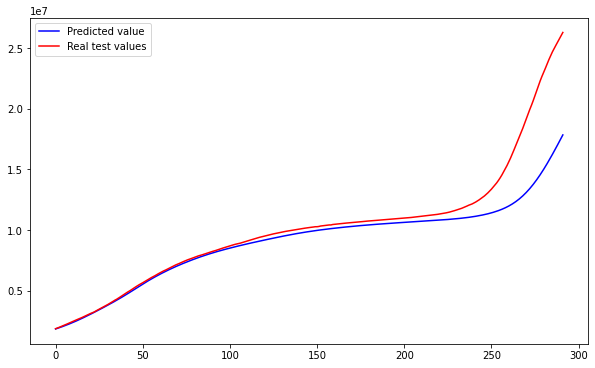

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(y_pred,color='blue',label='Predicted value')
plt.plot(y_test,color='red',label='Real test values')
plt.legend()
plt.show()